# Introductory data processing and analytics
### in Python, using pandas

pandas is a Python library for analyzing and organizing tabular data. It's probably the most common library for working with both big and small datasets in Python, and is the basis for working with more analytical packages (e.g. numpy, scipy, scikit-learn) and analyzing geographic data (e.g. geopandas)

This notebook provides an intro to pandas for analyzing urban data. We'll be learning the following
 - TODO

In [26]:
import pandas as pd

## DataFrames: the basic unit of pandas

In pandas, a `DataFrame` is a tabular data structure similar to a spreadsheet, where data is organized in rows and columns. These can contain different kinds of data, such as numbers, strings, dates, and so on. When we load data in pandas, we typically load it into the structure of a `DataFrame`.

Let's first take a look at a small dataset, Canadian municipalities and their population in 2021 and 2016, based on Census data. In Statistics Canada lingo, these are called [Census Subdivisions](https://www12.statcan.gc.ca/census-recensement/2021/ref/dict/az/Definition-eng.cfm?ID=geo012). This dataset only includes municipalities with a population greater than 25,000 in 2021.

The main method for loading csv data is to use the [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function, but pandas can also read and write [many other](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) data formats.

In [27]:
df = pd.read_csv("data/cities.csv")

Great! Now our data is stored in the variable `df` in the structure of a `DataFrame`.

### Exploring

Let's explore what this data frame looks like. Adding the function `.head(N)` or `.tail(N)` prints the top or bottom `N` rows of the DataFrame. The following prints the first 10 rows - **see if you can print the bottom 10 rows or a different number of rows**.

In [3]:
df.head(10)

,Name,Prov/terr,"Population, 2021","Population, 2016"
0,Abbotsford,B.C.,153524,141397
1,Airdrie,Alta.,74100,61581
2,Ajax,Ont.,126666,119677
3,Alma,Que.,30331,30771
4,Aurora,Ont.,62057,55445
5,Barrie,Ont.,147829,141434
6,Belleville,Ont.,55071,50716
7,Blainville,Que.,59819,56863
8,Boisbriand,Que.,28308,26884
9,Boucherville,Que.,41743,41671


Notice that each column has a unique name. We can view the data of this column alone by using that name, and see what unique values exist using `.unique()`. **Try viewing the data of another column**. Beware of upper and lower case -- exact names matter.

In [4]:
df['Prov/terr'].head(10)  # Top 10 only

0     B.C.
1    Alta.
2     Ont.
3     Que.
4     Ont.
5     Ont.
6     Ont.
7     Que.
8     Que.
9     Que.
Name: Prov/terr, dtype: object

In [5]:
df['Prov/terr'].unique()  # Unique values for the *full* dataset - what happens if you do df['Prov/terr'].head(10).unique()?

array(['B.C.', 'Alta.', 'Ont.', 'Que.', 'Man.', 'N.S.', 'P.E.I.', 'N.L.',
       'N.B.', 'Sask.', 'Y.T.'], dtype=object)

### Filtering and sorting data

We can use the columns to identify data that we might want to filter by. The line below shows data only for Ontario, **but see if you can filter for another province or territory**.

In [6]:
df.loc[df['Prov/terr'] == 'Ont.']

,Name,Prov/terr,"Population, 2021","Population, 2016"
2,Ajax,Ont.,126666,119677
4,Aurora,Ont.,62057,55445
5,Barrie,Ont.,147829,141434
6,Belleville,Ont.,55071,50716
10,Bradford West Gwillimbury,Ont.,42880,35325
...,...,...,...,...
171,Whitby,Ont.,138501,128377
172,Whitchurch-Stouffville,Ont.,49864,45837
174,Windsor,Ont.,229660,217188
177,Woodstock,Ont.,46705,41098


Pandas allows us to use other similar mathematical concepts filter for data. Previously, we asked for all data in Ontario. **Now, filter for all cities which had a population of at least 100,000 in 2021**.

HINT: in Python, "greater than or equals to" (i.e., "at least") is represented using the syntax `>=`.

Pandas also allows us to combine filtering conditions. **Use the template below to select for all cities in Ontario with a population of over 100,000 in 2021**.

In [ ]:
df.loc[(df["Prov/terr"] == "Ont.") & (YOUR CONDITION HERE)]

Now let's count how many cities actually meet these conditions. Run the line below to see how many cities there are in this data set in Ontario.

In [7]:
df.loc[df['Prov/terr'] == 'Ont.'].count()

Name                69
Prov/terr           69
Population, 2021    69
Population, 2016    69
dtype: int64

The function `.count()` tells us how much data there is for each column - but if we wanted to just see one column, we could also filter for that individual column using `df[COL_NAME]`. **Try a different condition and count the amount of data for it**.

You might have noticed that these cities are in alphabetical order - what if we wanted to see them in the order of population? In pandas, we do this using the [sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) function. The default is to sort in ascending order, so we set this to be `False` (i.e. descending) so the most populous cities are at the top.

In [8]:
df.sort_values(by='Population, 2021', ascending=False)

,Name,Prov/terr,"Population, 2021","Population, 2016"
158,Toronto,Ont.,2794356,2731571
89,Montréal,Que.,1762949,1704694
19,Calgary,Alta.,1306784,1239220
106,Ottawa,Ont.,1017449,934243
42,Edmonton,Alta.,1010899,933088
...,...,...,...,...
130,Saint-Bruno-de-Montarville,Que.,26273,26197
155,Thetford Mines,Que.,26072,25403
75,Lincoln,Ont.,25719,23787
115,Prince Edward County,Ont.,25704,24735


Let's put some in this together now. **Filter the data to show all cities which are in the province of Quebec with at least a population of 50,000 in 2016, and make sure to sort the cities by their 2016 population**.

HINT: You can do this in two steps (which is more readable) by storing the data that you filter into a variable called `df_filtered`, then running the command to sort the values on `df_filtered`.

## Frame physics: modifying DataFrames

### Cleaning, renaming, and NaNs

Often, the data we have might not be in the condition want it to be in. Some data might be missing, and other data might have odd naming conventions.

A simple example is that we might want all city names to be lowercase - which is what the code below does.

In [9]:
df['Name'] = df['Name'].str.lower()
df

,Name,Prov/terr,"Population, 2021","Population, 2016"
0,abbotsford,B.C.,153524,141397
1,airdrie,Alta.,74100,61581
2,ajax,Ont.,126666,119677
3,alma,Que.,30331,30771
4,aurora,Ont.,62057,55445
...,...,...,...,...
174,windsor,Ont.,229660,217188
175,winnipeg,Man.,749607,705244
176,wood buffalo,Alta.,72326,71594
177,woodstock,Ont.,46705,41098


Pandas has a number of methods like `str.lower()` (see the [full API](https://pandas.pydata.org/docs/reference/index.html)) - but that isn't the important thing here. In this case, notice that we directly modified the existing values of a column. We might not always want to do this, but often it is a good way of saving memory and shows that data frames are not just static forms but modifiable.

Likewise, we might want better names for the columns we have. **Take a look at the [API for `.rename()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) and modify the data frame `df` such that we rename the column `Name` to `City`**. Pandas has more methods than we could ever remember - so learning to navigate the API is a crucial part of using the library.

HINT: Take a look at the first example

Lastly, our data might be missing values. This can create complications when we want to produce summary statistics or visualizations. There are different strategies for dealing with this (i.e., imputing data),  but the easiest is just to remove them. But first come out let's check how much data is missing.

In [16]:
df.isnull().sum()

Name                3
Prov/terr           4
Population, 2021    3
Population, 2016    4
dtype: int64

It seems that each column has a couple of data points missing. Let's take a look at which rows these occur in. Similar to how we created a condition to filter for certain data, the code below creates a condition to filter for rows with missing data.

In [15]:
df.loc[df.isnull().any(axis=1)]

,Name,Prov/terr,"Population, 2021","Population, 2016"
7,Blainville,Que.,59819.0,NaN
18,Caledon,NaN,76581.0,66502.0
30,NaN,Ont.,101427.0,92013.0
40,Drummondville,Que.,NaN,75423.0
51,Grimsby,Ont.,28883.0,NaN
64,La Prairie,NaN,26406.0,24110.0
78,NaN,N.S.,25545.0,24863.0
86,Mission,NaN,41519.0,38554.0
109,Peterborough,Ont.,NaN,NaN
131,NaN,Que.,29954.0,27359.0


You can see that some rows are missing multiple values, While others are just missing one. We can remove rows which have missing data using the function [dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) and assign it to `df` so we're working with complete data only going forward. **Modify the code below to drop rows whose empty values are in one of the two population columns - that is, if the name or province is missing, we want to keep that row still**. Look at the API to figure this out, specifically the argument `subset` for `.dropna()`

In [17]:
df = df.dropna()

In [19]:
df.loc[df.isnull().any(axis=1)]

,Name,Prov/terr,"Population, 2021","Population, 2016"


Great. Now let's reset to our original data frame and exclude any missing values.

In [23]:
df = pd.read_csv("data/cities.csv")
df = df.dropna()

### Creating new columns 

We can add or delete columns as needed. Let's first add a column which shows the change in population between 2021 and 2016 and then sort by the cities that lost the most people.

In [24]:
df["raw_pop_change"] = df["Population, 2021"] - df["Population, 2016"]
df.sort_values("raw_pop_change").tail(5)

,Name,Prov/terr,"Population, 2021","Population, 2016",raw_pop_change
158,Toronto,Ont.,2794356.0,2731571.0,62785.0
11,Brampton,Ont.,656480.0,593638.0,62842.0
19,Calgary,Alta.,1306784.0,1239220.0,67564.0
42,Edmonton,Alta.,1010899.0,933088.0,77811.0
106,Ottawa,Ont.,1017449.0,934243.0,83206.0


Pandas supports mathematical equations between columns, just like the subtraction we did above. **Create a new column called `pct_pop_change` that computes the percentage change in population between 2016 and 2021, and sort by the cities with the greatest increase**.

HINT: the way to compute percent change is `(Y - X) / X`.

Now let's clear these new columns out using [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html). 

In [ ]:
df = df.drop(columns=['raw_pop_change', 'pct_pop_change'])

### Concatenating and joining tables

Much of the time, we are working with multiple sets of data which may overlap in key ways. Perhaps we want to include measures of income in cities, or look at voting patterns - this may require us to combine multiple data frames so we can analyze them.

Pandas methods to combine data frames are quite similar to that of database operations - if you've worked with SQL before, this will come very easily to you. There's an [extensive tutorial](https://pandas.pydata.org/docs/user_guide/merging.html#concat) on this topic, but we'll just focus on the simple case of `.concat()`.

TODO: example of appending rows together

TODO: example of joining by column, perhaps with explanation of some of the arguments

TODO: exercise

## Learning about data: summarizing tables

The data we have is only as good as we understand what's going on. There's some basic methods in pandas we can use to get an idea of what the data says.

### `.describe()` and aggregation

The most basic function you can use to get an idea of what's going on is `.describe()`. It shows you how much data there is, and a number of summary statistics. 

**Modify the code below to report summary statistics for cities in Quebec only**.

In [11]:
df.describe()

,"Population, 2021","Population, 2016"
count,1.760000e+02,1.750000e+02
mean,1.517228e+05,1.441686e+05
std,3.004616e+05,2.899143e+05
min,2.554500e+04,2.378700e+04
25%,3.654350e+04,3.417500e+04
50%,6.303350e+04,6.158100e+04
75%,1.325145e+05,1.184810e+05
max,2.794356e+06,2.731571e+06


Instead of picking out an examining a subset of the data one by one, we can use the function `.groupby()`. Given a column name, it will group rows which have the same value. In the example below, that means grouping every row which has the same province name. We can then apply a function to this (or multiple functions using `.agg()`) to examine different aspects of the data.

In [18]:
# Group by province and calculate total population
province_pop = df.groupby('Prov/terr')['Population, 2021'].sum()
print("Total population by province:")
province_pop.sort_values(ascending=False)

Total population by province:


Prov/terr
Ont.      11728618.0
Que.       5563882.0
B.C.       3662922.0
Alta.      3192892.0
Man.        800920.0
Sask.       563966.0
N.S.        559058.0
N.B.        240595.0
N.L.        137693.0
P.E.I.       38809.0
Y.T.         28201.0
Name: Population, 2021, dtype: float64

In [19]:
# Multiple aggregations
stats = df.groupby('Prov/terr')['Population, 2021'].agg(['count', 'mean', 'max', 'sum'])
stats

,count,mean,max,sum
Prov/terr,,,,
Alta.,17,187817.176471,1306784.0,3192892.0
B.C.,29,126307.655172,662248.0,3662922.0
Man.,2,400460.000000,749607.0,800920.0
N.B.,4,60148.750000,79470.0,240595.0
N.L.,2,68846.500000,110525.0,137693.0
N.S.,3,186352.666667,439819.0,559058.0
Ont.,66,177706.333333,2794356.0,11728618.0
P.E.I.,1,38809.000000,38809.0,38809.0
Que.,43,129392.604651,1762949.0,5563882.0


Below, we've added a column which shows the percent growth for each city. **Use `.groupby('Prov/terr')`  and use the function `.median()` (just as we used `.sum()` above) to observe the median growth rate per province or territory**. Make sure to use `sort_values()` and set ascending to `False`.

In [31]:
df['%Growth'] = (df['Population, 2021'] - df['Population, 2016']) / df['Population, 2016'] 
# CODE HERE


### Cross tabulation

To analyze how city sizes vary across provinces (i.e., to cross tabulate them), we need two tools:
 - `pd.cut` bins continuous numbers (like population) into categories (e.g., "Small"/"Medium"/"Large"), turning numbers into meaningful groups.
 - `pd.crosstab` counts how often these groups appear together—like how many "Medium" cities exist per province—revealing patterns that raw numbers hide.

In [29]:
# Create a size category column
df['Size'] = pd.cut(df['Population, 2021'],
                    bins=[0, 50000, 200000, float('inf')],
                    labels=['Small', 'Medium', 'Large'])

# Cross-tab: Province vs. Size
size_table = pd.crosstab(df['Prov/terr'], df['Size'], margins=True)
size_table

Size,Small,Medium,Large,All
Prov/terr,,,,
Alta.,7,8,2,17
B.C.,9,16,4,29
Man.,0,1,1,2
N.B.,1,3,0,4
N.L.,1,1,0,2
N.S.,1,1,1,3
Ont.,26,28,12,66
P.E.I.,1,0,0,1
Que.,23,15,5,43


Recall that we just created the column `'%Growth'` as well. **Use these two functions to create different bins for different levels of growth and cross tabulate them**.

### Simple visualization

<Axes: title={'center': 'Population Growth: 2016 vs. 2021'}, xlabel='Population, 2016', ylabel='Population, 2021'>

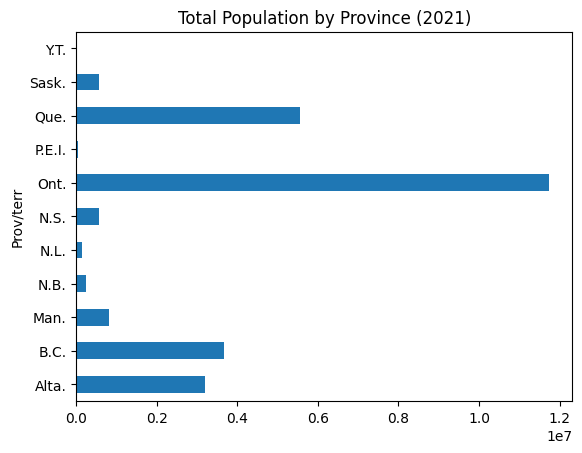

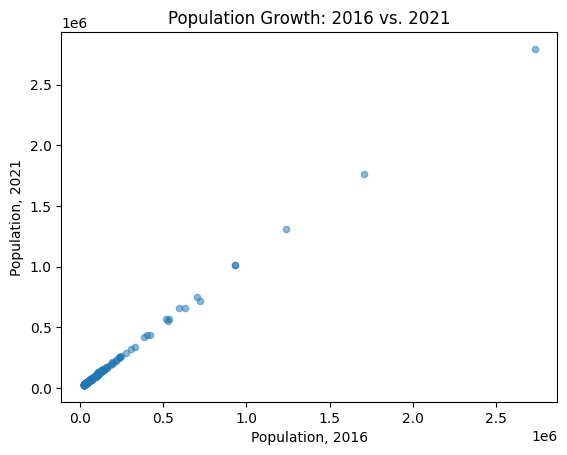

In [36]:
# Bar plot: Total population by province
df.groupby('Prov/terr')['Population, 2021'].sum().plot(
    kind='barh',
    title='Total Population by Province (2021)'
)

# Scatter plot: 2016 vs. 2021 populations
df.plot.scatter(x='Population, 2016',
                y='Population, 2021',
                alpha=0.5,
                title='Population Growth: 2016 vs. 2021')


## Data wrangling: finding, loading, and saving data

TODO: Motivation

In [ ]:
# TODO: Example